# <b> Author <span style='color:#0000FF'>|</span> Omar Mohamed Yehia Mohamed </b>

## The Sparks Foundation 

### Task #2 : Prediction using Unsupervised ML 

#### Dataset : Iris.csv (https://bit.ly/3kXTdox)
#### Algorithms used here : K-Means Clustering | Hierarical Clustering

## <b> 1 <span style='color:#0000FF'>|</span> Importing libraries</b>
 

In [112]:
%matplotlib inline

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering


%matplotlib inline
sns.set(rc={'figure.figsize': [10, 6]}, font_scale=1.3)

# <b> 2 <span style='color:#0000FF'>|</span> Reading the dataset</b>

In [113]:
df=pd.read_csv('Iris.csv')
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


**K-Means is considered an unsupervised learning algorthm. This means you only need a features matrix. In the iris dataset, there are four features. In this notebook, the features matrix will only be two features as it is easier to visualize clusters in two dimensions. KMeans is a popular clustering algorithm that we can use to find structure in our data.**



In [114]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [115]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,150.0,75.500000,43.445368,1.0,38.25,75.50,112.75,150.0
SepalLengthCm,150.0,5.843333,0.828066,4.3,5.10,5.80,6.40,7.9
SepalWidthCm,150.0,3.054000,0.433594,2.0,2.80,3.00,3.30,4.4
PetalLengthCm,150.0,3.758667,1.764420,1.0,1.60,4.35,5.10,6.9
PetalWidthCm,150.0,1.198667,0.763161,0.1,0.30,1.30,1.80,2.5


In [116]:
# Drop id column 
df.drop(columns='Id',inplace=True)

In [117]:
df.describe(include='O').T

,count,unique,top,freq
Species,150,3,Iris-setosa,50


# <b> 3 <span style='color:#0000FF'>|</span> EDA & Visualization </b>


<div style="color:yellow;display:fill;border-radius:8px;
            background-color:#ffcc00;font-size:150%;
            font-family:Nexa;letter-spacing:0.5px">
    <p style="padding: 8px
;color:black;"><b> Correlation Matrix  </b></p>
</div>. 

In [118]:
''' Function to plot correlation of features '''
def corrMat(df,id=False):
    
    corr_mat = df.corr().round(2)
    f, ax = plt.subplots(figsize=(6,6))
    mask = np.zeros_like(corr_mat,dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True
    sns.heatmap(corr_mat,mask=mask,vmin=-1,vmax=1,center=0, 
                cmap='rainbow',square=False,lw=2,annot=True,cbar=False);plt.show()

C:\Users\ascom\anaconda3\lib\site-packages\ipykernel_launcher.py:6: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  


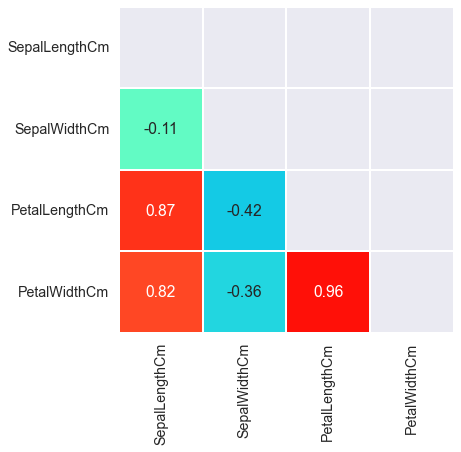

In [119]:
corrMat(df)

In [120]:
df.Species.value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

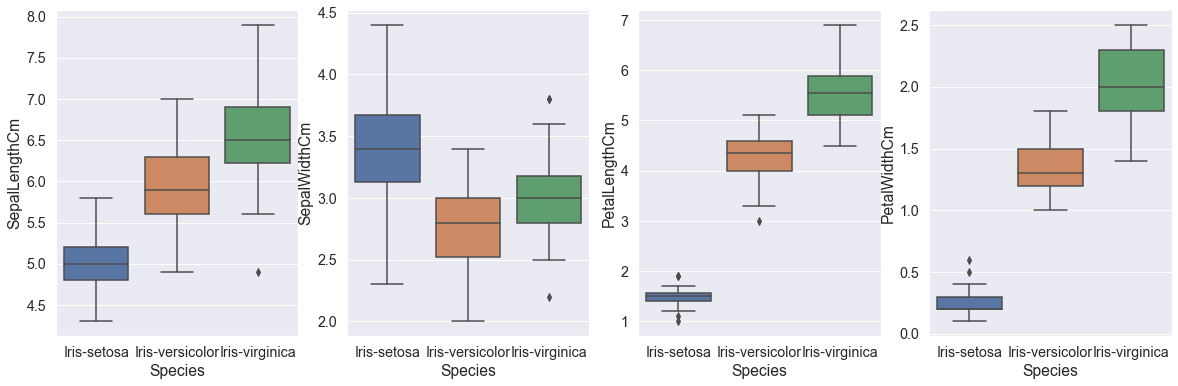

In [121]:
fig,ax=plt.subplots(1,4,figsize=(20,6))
num_cols=['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']
for i,col in enumerate(num_cols):
    sns.boxplot(data=df,x='Species',y=col,ax=ax[i])

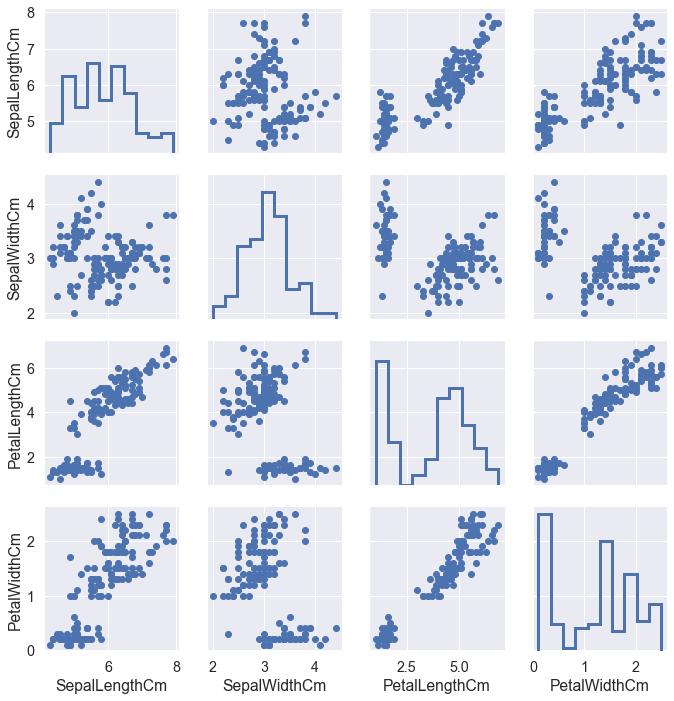

In [122]:
g = sns.PairGrid(df.loc[:,["SepalLengthCm","SepalWidthCm","PetalLengthCm","PetalWidthCm"]])
g.map_diag(plt.hist, histtype="step", linewidth=3)
g.map_offdiag(plt.scatter)

# <b>5 <span style='color:#0000FF'>|</span> Data Preprocessing</b>

<div style="color:yellow;display:fill;border-radius:8px;
            background-color:#0000FF;font-size:150%;
            font-family:Nexa;letter-spacing:0.5px">
    <p style="padding: 8px
;color:white;"><b>5.1 | Encoding  </b></p>
</div>. 

In [123]:
df=pd.get_dummies(df,columns=['Species'],drop_first=True)

In [124]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species_Iris-versicolor,Species_Iris-virginica
0,5.1,3.5,1.4,0.2,0,0
1,4.9,3.0,1.4,0.2,0,0
2,4.7,3.2,1.3,0.2,0,0
3,4.6,3.1,1.5,0.2,0,0
4,5.0,3.6,1.4,0.2,0,0


<div style="color:yellow;display:fill;border-radius:8px;
            background-color:#0000FF;font-size:150%;
            font-family:Nexa;letter-spacing:0.5px">
    <p style="padding: 8px
;color:white;"><b>5.2 | Standrization </b></p>
</div>

In [125]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

df_scaled = scaler.fit_transform(df)

In [126]:
df_scaled

array([[-9.00681170e-01,  1.03205722e+00, -1.34127240e+00,
        -1.31297673e+00, -7.07106781e-01, -7.07106781e-01],
       [-1.14301691e+00, -1.24957601e-01, -1.34127240e+00,
        -1.31297673e+00, -7.07106781e-01, -7.07106781e-01],
       [-1.38535265e+00,  3.37848329e-01, -1.39813811e+00,
        -1.31297673e+00, -7.07106781e-01, -7.07106781e-01],
       [-1.50652052e+00,  1.06445364e-01, -1.28440670e+00,
        -1.31297673e+00, -7.07106781e-01, -7.07106781e-01],
       [-1.02184904e+00,  1.26346019e+00, -1.34127240e+00,
        -1.31297673e+00, -7.07106781e-01, -7.07106781e-01],
       [-5.37177559e-01,  1.95766909e+00, -1.17067529e+00,
        -1.05003079e+00, -7.07106781e-01, -7.07106781e-01],
       [-1.50652052e+00,  8.00654259e-01, -1.34127240e+00,
        -1.18150376e+00, -7.07106781e-01, -7.07106781e-01],
       [-1.02184904e+00,  8.00654259e-01, -1.28440670e+00,
        -1.31297673e+00, -7.07106781e-01, -7.07106781e-01],
       [-1.74885626e+00, -3.56360566e-01, -1.341

# <b>6 <span style='color:#0000FF'>|</span> Modeling</b>

<div style="color:yellow;display:fill;border-radius:8px;
            background-color:#ffcc00;font-size:150%;
            font-family:Nexa;letter-spacing:0.5px">
    <p style="padding: 8px
;color:black;"><b> K-means Clustering  </b></p>
</div>. 

<div style="color:yellow;display:fill;border-radius:8px;
            background-color:#0000FF;font-size:150%;
            font-family:Nexa;letter-spacing:0.5px">
    <p style="padding: 8px
;color:white;"><b> choose the best number of clusters (K Value) using Elbow Method </b></p>
</div>

C:\Users\ascom\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1037: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  "KMeans is known to have a memory leak on Windows "


Text(0, 0.5, 'Score')

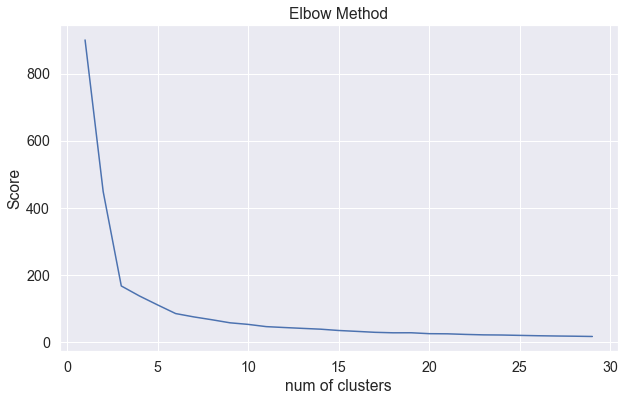

In [127]:
scores = []
for i in range(1, 30):
    model = KMeans(n_clusters=i)
    model.fit(df_scaled)
    scores.append(model.inertia_)
plt.plot(range(1, 30), scores)
plt.title("Elbow Method")
plt.xlabel("num of clusters")
plt.ylabel("Score")

### **the best clusters number is 3**

In [128]:
# from the scores, turns out the best clusters number is 5
model = KMeans(n_clusters=3,random_state=4)
clusters = model.fit_predict(df_scaled)
clusters

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [129]:
# Get labels and cluster centroids
labels = model.labels_
centroids = model.cluster_centers_

In [130]:
labels

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [131]:
centroids

array([[ 0.90229674, -0.18512237,  1.01979162,  1.08771971, -0.70710678,
         1.41421356],
       [ 0.11228223, -0.65718442,  0.28508673,  0.16740892,  1.41421356,
        -0.70710678],
       [-1.01457897,  0.84230679, -1.30487835, -1.25512862, -0.70710678,
        -0.70710678]])

### Visualising the clusters  On the first two columns

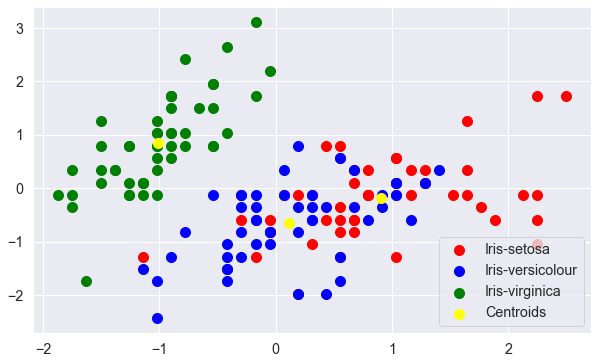

In [132]:

plt.scatter(df_scaled[clusters == 0, 0], df_scaled[clusters == 0, 1], 
            s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(df_scaled[clusters == 1, 0], df_scaled[clusters == 1, 1], 
            s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(df_scaled[clusters == 2, 0], df_scaled[clusters == 2, 1],
            s = 100, c = 'green', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(centroids[:, 0], centroids[:,1], 
            s = 100, c = 'yellow', label = 'Centroids')

plt.legend()

<div style="color:yellow;display:fill;border-radius:8px;
            background-color:#ffcc00;font-size:150%;
            font-family:Nexa;letter-spacing:0.5px">
    <p style="padding: 8px
;color:black;"><b> Hierarchical Clustering  </b></p>
</div>. 

<div style="color:yellow;display:fill;border-radius:8px;
            background-color:#0000FF;font-size:150%;
            font-family:Nexa;letter-spacing:0.5px">
    <p style="padding: 8px
;color:white;"><b> choose the best number of clusters using The Dendrogram </b></p>
</div>

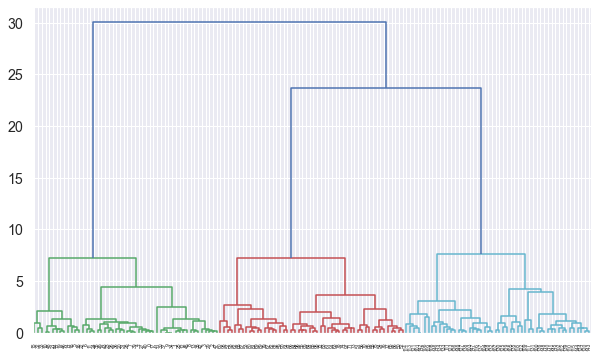

In [133]:
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(df_scaled, method='ward'))

### from the dendrogram , turns out the best clusters number is 3

In [144]:
model = AgglomerativeClustering(n_clusters=3)
clusters = model.fit_predict(df_scaled)
clusters

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [145]:
df['Clusters']=clusters

<AxesSubplot:xlabel='SepalLengthCm', ylabel='SepalWidthCm'>

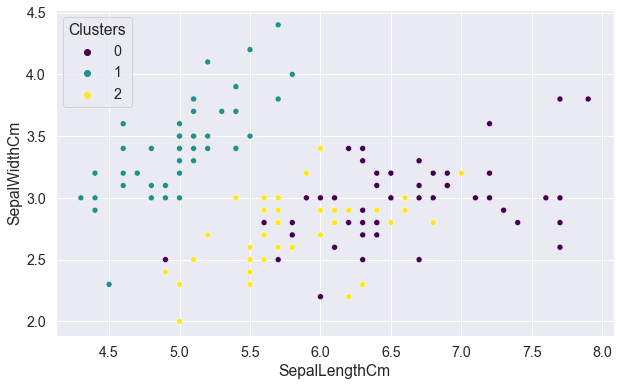

In [146]:
sns.scatterplot(x="SepalLengthCm",y="SepalWidthCm", data=df, hue="Clusters",palette='viridis')

### Thanks!